In [1]:
import pandas as pd
from pandas import DataFrame, Series, Index
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

matplotlib.rcParams["font.size"] = 10
plt.rcParams['pdf.fonttype'] = 42
df = pd.read_csv("Madison.csv")
df.head()
plt.rcParams['font.family'] = 'Calibri'

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import sqlite3
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

def qry(sql,a):
    return pd.read_sql(sql,a)

In [3]:
con12=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">0 and "POSTSPD1"<=25 and "POSTSPD2">0 and "POSTSPD2"<=25
GROUP BY "INJSVR"
""",conn)

con13=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=30 and "POSTSPD1"<=40 and "POSTSPD2">=30 and "POSTSPD2"<=40
GROUP BY "INJSVR"
""",conn)

con14=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=45 and "POSTSPD1"<=55 and "POSTSPD2">=45 and "POSTSPD2"<=55
GROUP BY "INJSVR"
""",conn)

con15=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=60 and "POSTSPD2">=60
GROUP BY "INJSVR"
""",conn)

In [4]:
import math
data={"0-25":[(6/2471)*100,(334/2471)*100,(2131/2471)*100],"30-40":[(25/3321)*100,(382/3321)*100,(2914/3321)*100],"45-55":[(14/988)*100,(155/988)*100,(819/988)*100],">60":[(9/271)*100,(44/271)*100,(218/271)*100]}
df=pd.DataFrame(data,index=["Fatal","In-capacitating","Non-Incapacitating"])
df1=df.transpose()
print(df1)

          Fatal  In-capacitating  Non-Incapacitating
0-25   0.242817        13.516795           86.240389
30-40  0.752785        11.502559           87.744655
45-55  1.417004        15.688259           82.894737
>60    3.321033        16.236162           80.442804


In [5]:
df=pd.read_csv("ProcessedData.csv")
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
YMADAY=qry("""
SELECT count(YEAR)
FROM df
WHERE ALCFLAG == "Y" and (NTFYHOUR >=6 and NTFYHOUR <20)
GROUP BY YEAR limit 19
""",conn)

YMANIGHT=qry("""
SELECT count(YEAR)
FROM df
WHERE ALCFLAG == "Y" and (NTFYHOUR <6 or NTFYHOUR >=20)
GROUP BY YEAR limit 19
""",conn)

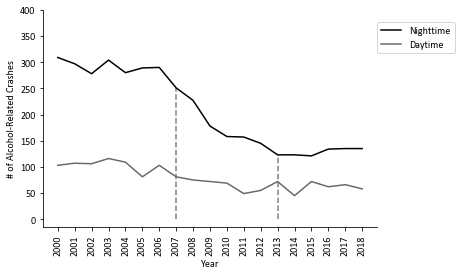

In [7]:
CONC= pd.concat([YMANIGHT,YMADAY], axis=1)
CONC.columns= ['Nighttime','Daytime']
ax=CONC.plot(color=["black","dimgrey"],stacked=False,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Alcohol-Related Crashes")
plt.vlines(7,0,251, linestyles = "dashed",color="grey")
plt.vlines(13,0,123, linestyles = "dashed",color="grey")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0, 401, 50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=10)

fig = matplotlib.pyplot.gcf()
fig.savefig('AYearcrashM.eps', dpi=100,bbox_inches="tight")

In [8]:
AMF=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="F"))
GROUP BY YEAR
""" ,conn)

AMM=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="M"))
GROUP BY YEAR
""",conn)

MF=qry("""
SELECT count(WEEK)
FROM df
WHERE ((SEX1 ="F"))
GROUP BY YEAR
""" ,conn)

MM=qry("""
SELECT count(WEEK)
FROM df
WHERE ((SEX1 ="M"))
GROUP BY YEAR
""",conn)

In [9]:
m5=pd.concat([MM[:19],MF[:19],AMM[:19],AMF[:19]],axis=1)
m5.columns=["Male Total","Female Total","Male Alcohol","Female Alcohol"]
m5.index=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",'2016',"2017","2018"]

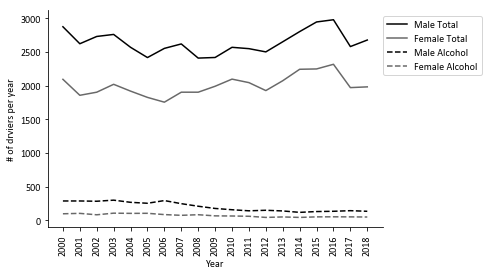

In [10]:
m5["Male Total"].plot.line(color="black",rot=90)
m5["Female Total"].plot.line(color="dimgrey",rot=90)
m5["Male Alcohol"].plot.line(color="black",style="--",rot=90)
m5["Female Alcohol"].plot.line(color="dimgrey",style="--",rot=90)

ax = plt.gca()
plt.xticks(np.arange(19),("2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",'2016',"2017","2018"))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Year")
ax.set_ylabel("# of drviers per year")
    
my_y_ticks = np.arange(0, 3300, 500)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.7],fontsize=10)
fig = matplotlib.pyplot.gcf()
fig.savefig('Gender.eps', dpi=100,bbox_inches="tight")

In [11]:
MUnder21=qry("""
SELECT count(WEEK) as "0-21"
FROM df
WHERE (AGE1<21 and AGE1>0) 
GROUP BY NTFYHOUR limit 24
""",conn)

M21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df
WHERE (AGE1>21 or AGE1=21) and AGE1<25 
GROUP BY NTFYHOUR limit 24
""",conn)

M25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df
WHERE (AGE1>25 or AGE1=25) and AGE1<35 
GROUP BY NTFYHOUR limit 24
""",conn)

M35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df
WHERE (AGE1>35 or AGE1=35) and AGE1<45
GROUP BY NTFYHOUR limit 24
""",conn)

M45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df
WHERE (AGE1>45 or AGE1=45) and AGE1<55 
GROUP BY NTFYHOUR limit 24
""",conn)

M55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df
WHERE (AGE1>55 or AGE1=55) and AGE1<65
GROUP BY NTFYHOUR limit 24
""",conn)

M65=qry("""
SELECT count(WEEK) as ">65"
FROM df
WHERE (AGE1>65) 
GROUP BY NTFYHOUR limit 24
""",conn)

m2=pd.concat([MUnder21,M21and25,M25and35,M35and45,M45and55,M55and65,M65],axis=1)
m2.index=["12am", "1 am", "2 am", "3 am", "4 am", "5 am","6 am","7 am","8 am","9 am","10am","11am","12pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10pm","11pm"]
N=["0-21","21-25","25-35","35-45","45-55","55-65",">65"]
S=m2.sum(axis=1)

for i in N:
    m2[i]=(m2[i]/S)*100

d:\搜狗高速下载\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


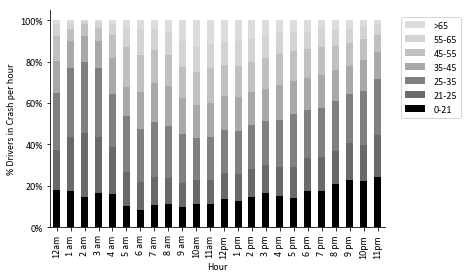

In [12]:
#color=["Indianred","cornflowerblue","hotpink","orange","plum","greenyellow","lightsalmon"]
color1=["black","dimgrey","grey","darkgrey","silver","lightgrey","gainsboro"]
ax=m2.plot.bar(colors=color1,rot=90,stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Hour")
ax.set_ylabel("% Drivers in Crash per hour")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=[1.05, 0.5],fontsize=10)

fig = matplotlib.pyplot.gcf()
fig.savefig('AgeM.eps', dpi=100,bbox_inches="tight")

In [13]:
crash = pd.read_csv("ProcessedData.csv")
conn = sqlite3.connect('crash.db')
crash.to_sql("crash", conn, if_exists="replace", index=False)

def qry(sql):
    return pd.read_sql(sql, conn)

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
SINJSVR_AGE_0 = qry ("""
SELECT INJSVR, count() as "0-25"
FROM crash
WHERE ((AGE1>0 and AGE1<25) or (AGE2>0 and AGE2<25)) 
GROUP BY INJSVR
""")

SINJSVR_AGE_25 = qry ("""
SELECT INJSVR, count() as "25-35"
FROM crash
WHERE (((AGE1>25 and AGE1<35) or (AGE1 = 25)) or ((AGE2>25 and AGE2<35) or (AGE2 = 25))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_35 = qry ("""
SELECT INJSVR, count() as "35-45"
FROM crash
WHERE (((AGE1>35 and AGE1<45) or  (AGE1 = 35)) or ((AGE2>35 and AGE2<45) or (AGE2 = 35))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_45 = qry ("""
SELECT INJSVR, count() as "45-55"
FROM crash
WHERE (((AGE1>45 and AGE1<55) or  (AGE1 = 45)) or ((AGE2>45 and AGE2<55) or (AGE2 = 45))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_55 = qry ("""
SELECT INJSVR, count() as "55-65"
FROM crash
WHERE (((AGE1>55 and AGE1<65) or  (AGE1 = 55)) or ((AGE2>55 and AGE2<65) or (AGE2 = 55))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_65 = qry ("""
SELECT INJSVR, count() as ">65"
FROM crash
WHERE (((AGE1>65) or  (AGE1 = 65)) or ((AGE2>65) or (AGE2 = 65))) 
GROUP BY INJSVR
""")

SINJSVR_AGE = pd.concat([SINJSVR_AGE_0, SINJSVR_AGE_25["25-35"], SINJSVR_AGE_35["35-45"], SINJSVR_AGE_45["45-55"], SINJSVR_AGE_55["55-65"], SINJSVR_AGE_65[">65"]], axis = 1)
SINJSVR_AGE_T = SINJSVR_AGE.set_index("INJSVR").transpose()
SINJSVR_AGE_SemiFinal = SINJSVR_AGE_T.drop(columns=[None,'C'])
SINJSVR_AGE_SemiFinal_T = SINJSVR_AGE_SemiFinal.transpose()

In [15]:
ISNULL_alo = crash["ALCFLAG"].isnull()
crash["ALCFLAG"].fillna("N",inplace=True)

INJSVR_AGE_0 = qry ("""
SELECT INJSVR, count() as "0-25"
FROM crash
WHERE ((AGE1>0 and AGE1<25) or (AGE2>0 and AGE2<25)) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_25 = qry ("""
SELECT INJSVR, count() as "25-35"
FROM crash
WHERE (((AGE1>25 and AGE1<35) or (AGE1 = 25)) or ((AGE2>25 and AGE2<35) or (AGE2 = 25))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_35 = qry ("""
SELECT INJSVR, count() as "35-45"
FROM crash
WHERE (((AGE1>35 and AGE1<45) or  (AGE1 = 35)) or ((AGE2>35 and AGE2<45) or (AGE2 = 35))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_45 = qry ("""
SELECT INJSVR, count() as "45-55"
FROM crash
WHERE (((AGE1>45 and AGE1<55) or  (AGE1 = 45)) or ((AGE2>45 and AGE2<55) or (AGE2 = 45))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_55 = qry ("""
SELECT INJSVR, count() as "55-65"
FROM crash
WHERE (((AGE1>55 and AGE1<65) or  (AGE1 = 55)) or ((AGE2>55 and AGE2<65) or (AGE2 = 55))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_65 = qry ("""
SELECT INJSVR, count() as ">65"
FROM crash
WHERE (((AGE1>65) or  (AGE1 = 65)) or ((AGE2>65) or (AGE2 = 65))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE = pd.concat([INJSVR_AGE_0, INJSVR_AGE_25["25-35"], INJSVR_AGE_35["35-45"], INJSVR_AGE_45["45-55"], INJSVR_AGE_55["55-65"], INJSVR_AGE_65[">65"]], axis = 1)
INJSVR_AGE_T = INJSVR_AGE.set_index("INJSVR").transpose()
INJSVR_AGE_SemiFinal = INJSVR_AGE_T.drop(columns=[None,'C'])
INJSVR_AGE_SemiFinal_T = INJSVR_AGE_SemiFinal.transpose()
INJSVR_AGE_SemiFinal_T["55-65"]["K"]=0
INJSVR_AGE_SemiFinal_T[">65"]=0

In [16]:
sum1 = INJSVR_AGE_SemiFinal_T["0-25"].sum()
sum2 = INJSVR_AGE_SemiFinal_T["25-35"].sum()
sum3 = INJSVR_AGE_SemiFinal_T["35-45"].sum()
sum4 = INJSVR_AGE_SemiFinal_T["45-55"].sum()
sum5 = INJSVR_AGE_SemiFinal_T["55-65"].sum()
sum6 = INJSVR_AGE_SemiFinal_T[">65"].sum()

INJSVR_AGE_SemiFinal_T_SUM = INJSVR_AGE_SemiFinal_T.replace([INJSVR_AGE_SemiFinal_T["0-25"]["A"],INJSVR_AGE_SemiFinal_T["0-25"]["B"],INJSVR_AGE_SemiFinal_T["0-25"]["K"],INJSVR_AGE_SemiFinal_T["25-35"]["A"], INJSVR_AGE_SemiFinal_T["25-35"]["B"],INJSVR_AGE_SemiFinal_T["25-35"]["K"],INJSVR_AGE_SemiFinal_T["35-45"]["A"],INJSVR_AGE_SemiFinal_T["35-45"]["B"],INJSVR_AGE_SemiFinal_T["35-45"]["K"],INJSVR_AGE_SemiFinal_T["45-55"]["A"],INJSVR_AGE_SemiFinal_T["45-55"]["B"],INJSVR_AGE_SemiFinal_T["45-55"]["K"],INJSVR_AGE_SemiFinal_T["55-65"]["A"],INJSVR_AGE_SemiFinal_T["55-65"]["B"],INJSVR_AGE_SemiFinal_T["55-65"]["K"],INJSVR_AGE_SemiFinal_T[">65"]["A"],INJSVR_AGE_SemiFinal_T[">65"]["B"],INJSVR_AGE_SemiFinal_T[">65"]["K"]], 
                               [sum1, sum1, sum1, sum2, sum2, sum2, sum3, sum3, sum3, sum4, sum4, sum4, sum5, sum5, sum5, sum6, sum6, sum6])

INJSVR_AGE_SemiFinal_T_SUM["0-25"]["K"]=626.0
INJSVR_AGE_SemiFinal_T_SUM["25-35"]["K"]=553.0
INJSVR_AGE_SemiFinal_T_SUM["35-45"]["A"]=359.0
INJSVR_AGE_SemiFinal_T_SUM["35-45"]["K"]=359.0
INJSVR_AGE_SemiFinal_T_SUM["55-65"]["A"]=89.0
INJSVR_AGE_SemiFinal_T_SUM["55-65"]["K"]=89.0

In [17]:
INJSVR_AGE_SemiFinal_T_PERCENT = INJSVR_AGE_SemiFinal_T*100/INJSVR_AGE_SemiFinal_T_SUM
INJSVR_AGE_SemiFinal_T_PERCENT["55-65"]["K"]=0.0
INJSVR_AGE_SemiFinal_T_PERCENT[">65"]["A"]=0.0
INJSVR_AGE_SemiFinal_T_PERCENT[">65"]["B"]=0.0
INJSVR_AGE_SemiFinal_T_PERCENT[">65"]["K"]=0.0
INJA=INJSVR_AGE_SemiFinal_T_PERCENT.round(2)

In [18]:
INJSVR_AGE_SemiFinal_T_NA= SINJSVR_AGE_SemiFinal_T-INJSVR_AGE_SemiFinal_T

In [19]:
sum1 = INJSVR_AGE_SemiFinal_T_NA["0-25"].sum()
sum2 = INJSVR_AGE_SemiFinal_T_NA["25-35"].sum()
sum3 = INJSVR_AGE_SemiFinal_T_NA["35-45"].sum()
sum4 = INJSVR_AGE_SemiFinal_T_NA["45-55"].sum()
sum5 = INJSVR_AGE_SemiFinal_T_NA["55-65"].sum()
sum6 = INJSVR_AGE_SemiFinal_T_NA[">65"].sum()

INJSVR_AGE_SemiFinal_T_NA_SUM = INJSVR_AGE_SemiFinal_T_NA.replace([INJSVR_AGE_SemiFinal_T_NA["0-25"]["A"],INJSVR_AGE_SemiFinal_T_NA["0-25"]["B"],INJSVR_AGE_SemiFinal_T_NA["0-25"]["K"],INJSVR_AGE_SemiFinal_T_NA["25-35"]["A"], INJSVR_AGE_SemiFinal_T_NA["25-35"]["B"],INJSVR_AGE_SemiFinal_T_NA["25-35"]["K"],INJSVR_AGE_SemiFinal_T_NA["35-45"]["A"],INJSVR_AGE_SemiFinal_T_NA["35-45"]["B"],INJSVR_AGE_SemiFinal_T_NA["35-45"]["K"],INJSVR_AGE_SemiFinal_T_NA["45-55"]["A"],INJSVR_AGE_SemiFinal_T_NA["45-55"]["B"],INJSVR_AGE_SemiFinal_T_NA["45-55"]["K"],INJSVR_AGE_SemiFinal_T_NA["55-65"]["A"],INJSVR_AGE_SemiFinal_T_NA["55-65"]["B"],INJSVR_AGE_SemiFinal_T_NA["55-65"]["K"],INJSVR_AGE_SemiFinal_T_NA[">65"]["A"],INJSVR_AGE_SemiFinal_T_NA[">65"]["B"],INJSVR_AGE_SemiFinal_T_NA[">65"]["K"]], 
                               [sum1, sum1, sum1, sum2, sum2, sum2, sum3, sum3, sum3, sum4, sum4, sum4, sum5, sum5, sum5, sum6, sum6, sum6])

INJSVR_AGE_SemiFinal_T_NA_SUM["25-35"]["K"]=399.0
INJSVR_AGE_SemiFinal_T_NA_SUM["35-45"]["K"]=199.0

In [20]:
INJSVR_AGE_SemiFinal_T_NA_PERCENT = INJSVR_AGE_SemiFinal_T_NA*100/INJSVR_AGE_SemiFinal_T_NA_SUM
INJSVR_AGE_SemiFinal_T_NA_PERCENT=INJSVR_AGE_SemiFinal_T_NA_PERCENT.round(2)

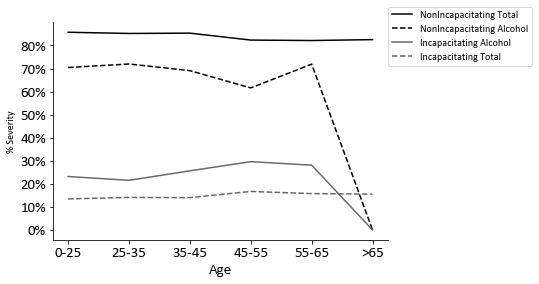

In [21]:
m1_t = pd.DataFrame({
 'Incapacitating Total':INJSVR_AGE_SemiFinal_T_NA_PERCENT.loc["A"].round(2),
 'NonIncapacitating Total':INJSVR_AGE_SemiFinal_T_NA_PERCENT.loc["B"].round(2),
 'Incapacitating Alcohol' : INJA.loc["A"].round(2),
 'NonIncapacitating Alcohol' : INJA.loc["B"].round(2) })

m1_t['NonIncapacitating Total'].plot(color="black",stacked=False,fontsize=15,rot=0)
m1_t['NonIncapacitating Alcohol'].plot(color="black",style='--',stacked=False,rot=0)
m1_t['Incapacitating Alcohol'].plot(color="dimgrey",stacked=False,rot=0)
m1_t['Incapacitating Total'].plot(color="dimgrey",style='--',stacked=False,fontsize=15,rot=0)
ax = plt.gca()
plt.xticks(np.arange(6),('0-25', '25-35', '35-45', '45-55', '55-65', '>65'))
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("% Severity",fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,90, 10)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=10)

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("AgeS.eps", bbox_inches="tight")

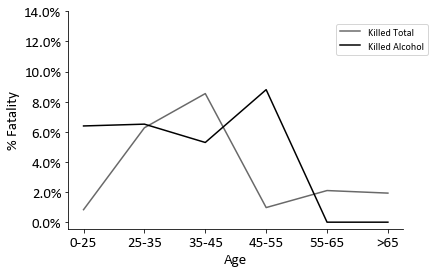

In [23]:
m1_t1 = pd.DataFrame({'Killed' : (INJSVR_AGE_SemiFinal_T_PERCENT.loc["K"].round(4))})
m1_t = pd.DataFrame({'Killed' : (INJSVR_AGE_SemiFinal_T_NA_PERCENT.loc["K"].round(4))})
m1_t['Killed'].plot(color="dimgrey",stacked=False,fontsize=15,rot=0,label="Killed Total")
m1_t1['Killed'].plot(color="black",stacked=False,fontsize=15,rot=0,label="Killed Alcohol")

ax = plt.gca()
plt.xticks(np.arange(6),('0-25', '25-35', '35-45', '45-55', '55-65', '>65'))
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("% Fatality",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,15,2)
plt.yticks(my_y_ticks)
ax.legend(loc=[0.8,0.8])

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("AgeSF.eps", bbox_inches="tight")

In [24]:
def qry(sql,a):
    return pd.read_sql(sql,a)

In [25]:
con12=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=2
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con12["Ratio"][i]=(con12["ALC"][i]/con12["Total"][i])*100

con13=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=3
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con13["Ratio"][i]=(con13["ALC"][i]/con13["Total"][i])*100

con14=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=4
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con14["Ratio"][i]=(con14["ALC"][i]/con14["Total"][i])*100

con15=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=5
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con15["Ratio"][i]=(con15["ALC"][i]/con15["Total"][i])*100

con16=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=6
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con16["Ratio"][i]=(con16["ALC"][i]/con16["Total"][i])*100

con17=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=7
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con17["Ratio"][i]=(con17["ALC"][i]/con17["Total"][i])*100

con18=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=1
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
     con18["Ratio"][i]=(con18["ALC"][i]/con18["Total"][i])*100
        

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

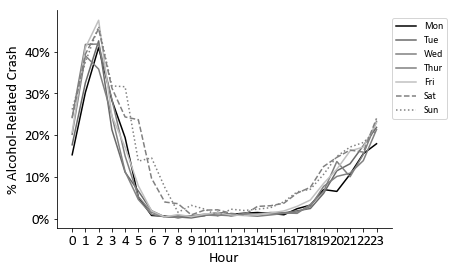

In [26]:
m1_t = pd.DataFrame({
 'Mon' : con12["Ratio"][0:24],
 'Tue' : con13["Ratio"][0:24],
 'Wed':con14["Ratio"][0:24],
 'Thur':con15["Ratio"][0:24],
 'Fri':con16["Ratio"][0:24],
 'Sat':con17["Ratio"][0:24],
 'Sun':con18["Ratio"][0:24]})

m1_t['Mon'].plot(color="black",stacked=False,fontsize=15,rot=0)
m1_t['Tue'].plot(color="dimgrey",stacked=False,fontsize=15,rot=0)
m1_t['Wed'].plot(color="grey",stacked=False,fontsize=15,rot=0)
m1_t['Thur'].plot(color="grey",stacked=False,fontsize=15,rot=0)
m1_t['Fri'].plot(color="silver",stacked=False,fontsize=15,rot=0)
m1_t['Sat'].plot(color="grey",linestyle='--',stacked=False,fontsize=15,rot=0)
m1_t['Sun'].plot(color="grey",linestyle=':',stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),(0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,50, 10)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.5])

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourAMD.eps", bbox_inches="tight")

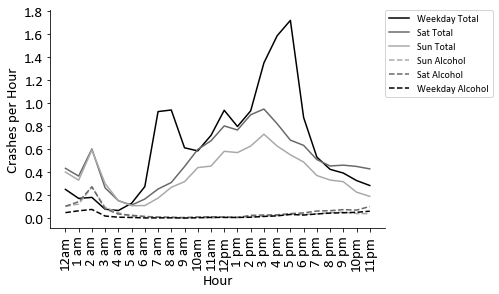

In [27]:
m1_t = pd.DataFrame({
 'Weekday Total' : (con12["Total"][0:24]+con13["Total"][0:24]+con14["Total"][0:24]+con15["Total"][0:24]+con16["Total"][0:24])/(5*19*52),
 'Sat Total':con17["Total"][0:24]/(19*52),
 'Sun Total':con18["Total"][0:24]/(19*52),
 'Weekday Alcohol' : (con12["ALC"][0:24]+con13["ALC"][0:24]+con14["ALC"][0:24]+con15["ALC"][0:24]+con16["ALC"][0:24])/(5*19*52),
 'Sat Alcohol':con17["ALC"][0:24]/(19*52),
 'Sun Alcohol':con18["ALC"][0:24]/(19*52),})

m1_t['Weekday Total'].plot(color="black",stacked=False,fontsize=15,rot=90)
m1_t['Sat Total'].plot(color="dimgrey",stacked=False,fontsize=15,rot=90)
m1_t['Sun Total'].plot(color="darkgrey",stacked=False,fontsize=15,rot=90)
m1_t['Sun Alcohol'].plot(color="darkgrey",linestyle='--',stacked=False,fontsize=15,rot=90)
m1_t['Sat Alcohol'].plot(color="dimgrey",linestyle='--',stacked=False,fontsize=15,rot=90)
m1_t['Weekday Alcohol'].plot(color="black",linestyle='--',stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(24),("12am", "1 am", "2 am", "3 am", "4 am", "5 am","6 am","7 am","8 am","9 am","10am","11am","12pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10pm","11pm"))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("Crashes per Hour",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,2, 0.2)
plt.yticks(my_y_ticks)
my_x_ticks = np.arange(0,24, 1)
plt.xticks(my_x_ticks)
ax.legend(loc=[1,0.6],fontsize=10)

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourNM.eps", bbox_inches="tight")

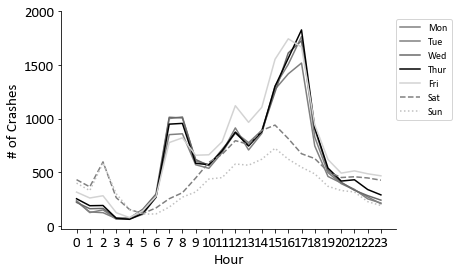

In [28]:
m1_t = pd.DataFrame({
 'Mon' : con12["Total"][0:24],
 'Tue' : con13["Total"][0:24],
 'Wed':con14["Total"][0:24],
 'Thur':con15["Total"][0:24],
 'Fri':con16["Total"][0:24],
 'Sat':con17["Total"][0:24],
 'Sun':con18["Total"][0:24]})
m1_t['Mon'].plot(color="grey",stacked=False,fontsize=15,rot=0)
m1_t['Tue'].plot(color="grey",stacked=False,fontsize=15,rot=0)
m1_t['Wed'].plot(color="dimgrey",stacked=False,fontsize=15,rot=0)
m1_t['Thur'].plot(color="black",stacked=False,fontsize=15,rot=0)
m1_t['Fri'].plot(color="lightgrey",stacked=False,fontsize=15,rot=0)
m1_t['Sat'].plot(color="grey",linestyle='--',stacked=False,fontsize=15,rot=0)
m1_t['Sun'].plot(color="silver",linestyle=':',stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),(0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("# of Crashes",fontsize=15)
#ax.set_title("# of Weekly Crash Distributed by Hour in Madison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,2100, 500)
plt.yticks(my_y_ticks)
my_x_ticks = np.arange(0,24, 1)
plt.xticks(my_x_ticks)
ax.legend(loc=[1,0.5])

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourNMD.eps", bbox_inches="tight")

In [29]:
def qry(sql):
    return pd.read_sql(sql, conn)

In [30]:
INJ_FAT_ACCDTYPE = qry ("""
SELECT ACCDTYPE, count(Month) as "Sum", sum(TOTFATL) as "Fatality",0 as "ratio"
FROM crash 
GROUP BY ACCDTYPE
ORDER BY Fatality DESC
""")

for i in range(len(INJ_FAT_ACCDTYPE)):
    INJ_FAT_ACCDTYPE["ratio"][i]=(INJ_FAT_ACCDTYPE["Fatality"][i]/INJ_FAT_ACCDTYPE["Sum"][i])*10000

TYPE=Series({"Train":5.55,"Pedestrian":3.07 ,"Jackknife":2.77,"Overturned vehicle":1.63,"Ditch":1.39,"Tree":1.27," Guardrail end":1.03,"Utility Pole":1.01,"Guardrail face":0.83,"Bike":0.62})
SUM=Series({"Train":18,"Pedestrian":1203 ,"Jackknife":36,"Overturned vehicle":488,"Ditch":286,"Tree":1884," Guardrail end":193,"Utility Pole":792,"Guardrail face":597,"Bike":1119})
m5=pd.concat([TYPE,SUM],axis=1)
m5.columns=["% Fatality","Total"]

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


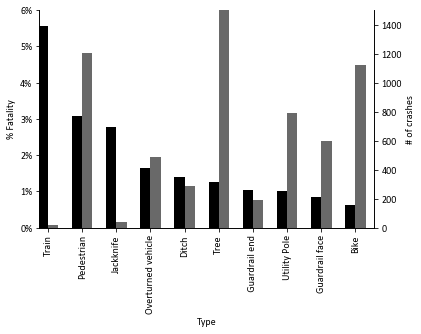

In [31]:
fig = plt.figure() 
ax = fig.add_subplot(111) # Create matplotlib axes 
ax2 = ax.twinx() 
width = 0.3
ax.set_xlabel("Type") 
ax.set_ylabel("% Fatality") 
ax2.set_ylabel("# of crashes")
ax.spines['top'].set_visible(False) 
ax2.spines['top'].set_visible(False) 

m5["% Fatality"].plot.bar(color="black", ax=ax, width=width,position=1) 
m5["Total"].plot.bar(color="dimgrey", ax=ax2, width=width,position=0) 

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt) 
ax.yaxis.set_major_formatter(yticks) 
ax.set_ylim(0,6) 
ax2.set_ylim(0,1500) 

fig = matplotlib.pyplot.gcf()
fig.savefig('TYPEF.eps', dpi=100, bbox_inches="tight")
plt.show()

In [32]:
SORT= qry ("""
SELECT ACCDTYPE,count()
FROM crash 
GROUP BY "ACCDTYPE"
ORDER BY count() DESC limit 10
""")

INJ_PED = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="PED"
GROUP BY "MONTH"
""")

INJ_BIKE = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="BIKE"
GROUP BY "MONTH"
""")

INJ_PKVEH = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="PK VEH"
GROUP BY "MONTH"
""")

INJ_TREE = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="TREE"
GROUP BY "MONTH"
""")

INJ_OTHNC = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="OTH NC"
GROUP BY "MONTH"
""")

INJ_TFSIGN = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="TFSIGN"
GROUP BY "MONTH"
""")

m1_t = pd.DataFrame({"Parked vehicle":INJ_PKVEH["count()"],"Tree":INJ_TREE["count()"],"Bike":INJ_BIKE["count()"],"Pedestrian":INJ_PED["count()"],"Trafiic sign":INJ_TFSIGN["count()"] })

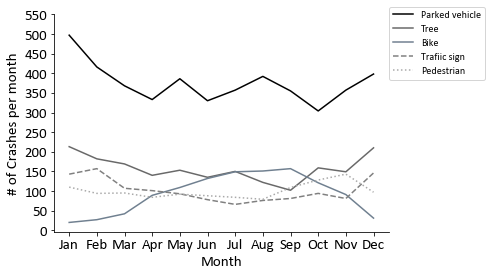

In [33]:
m1_t["Parked vehicle"].plot(color="black",fontsize=15,rot=0)
m1_t["Tree"].plot(color="dimgrey",fontsize=15,rot=0)
m1_t["Bike"].plot(color="slategrey",fontsize=15,rot=0)
m1_t["Trafiic sign"].plot(color="grey",linestyle='--',fontsize=15,rot=0)
m1_t["Pedestrian"].plot(color="darkgrey",linestyle=':',fontsize=15,rot=0)
ax = plt.gca()
ax.set_xlabel("Month",fontsize=15)
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_ylabel("# of Crashes per month",fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,600,50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.7],fontsize=10)
    
fig = matplotlib.pyplot.gcf()
fig.savefig("MonthM.eps", dpi=100,bbox_inches="tight")